<a href="https://colab.research.google.com/github/emine456/Machine_Learning/blob/main/Data_Analyse_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importation des packages nécessaire
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Importer les bases de données
application_data = pd.read_csv('/content/drive/MyDrive/Projet_Team_Will/application_data.csv')
previous_application_data = pd.read_csv('/content/drive/MyDrive/Projet_Team_Will/previous_application.csv')

In [4]:
previous_application_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Renommer les colonnes du dataset previous_application afin de ne pas retrouver le même nom de colonne lors de la fusion des datasets
previous_application_data.columns = [col + '_PREVIOUS' for col in previous_application_data.columns]

In [6]:
# Renommer la colonne de l'ID du crédit afin de pouvoir faire la jointure par la suite
previous_application_data = previous_application_data.rename(columns={'SK_ID_CURR_PREVIOUS': 'SK_ID_CURR'})

In [7]:
previous_application_data.head()

,SK_ID_PREV_PREVIOUS,SK_ID_CURR,NAME_CONTRACT_TYPE_PREVIOUS,AMT_ANNUITY_PREVIOUS,AMT_APPLICATION_PREVIOUS,AMT_CREDIT_PREVIOUS,AMT_DOWN_PAYMENT_PREVIOUS,AMT_GOODS_PRICE_PREVIOUS,WEEKDAY_APPR_PROCESS_START_PREVIOUS,HOUR_APPR_PROCESS_START_PREVIOUS,...,NAME_SELLER_INDUSTRY_PREVIOUS,CNT_PAYMENT_PREVIOUS,NAME_YIELD_GROUP_PREVIOUS,PRODUCT_COMBINATION_PREVIOUS,DAYS_FIRST_DRAWING_PREVIOUS,DAYS_FIRST_DUE_PREVIOUS,DAYS_LAST_DUE_1ST_VERSION_PREVIOUS,DAYS_LAST_DUE_PREVIOUS,DAYS_TERMINATION_PREVIOUS,NFLAG_INSURED_ON_APPROVAL_PREVIOUS
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Création de 3 listes pour distinguer le type de variable présent dans chaque colonne
char_cols = [i for i in previous_application_data.select_dtypes('object')]
int_cols = [i for i in previous_application_data.select_dtypes('int')]
float_cols = [i for i in previous_application_data.select_dtypes('float')]

# Affichage des dimensions de chaque liste
print(len(char_cols))
print(len(int_cols))
print(len(float_cols))

16
6
15


In [9]:
# Création de 3 sous dataset pour distinguer le type de variable présent dans chaque colonne
df_char = previous_application_data[char_cols]
df_int = previous_application_data[int_cols]
df_float = previous_application_data[float_cols]

In [10]:
# Jointure des deux dataframes selon l'id du prêt actuelle
df_merged = pd.merge(application_data,previous_application_data, on='SK_ID_CURR')

## Relation entre la raison de rejet de la demande précédente et le risque de défaut de paiement ?

<Axes: xlabel='CODE_REJECT_REASON_PREVIOUS', ylabel='count'>

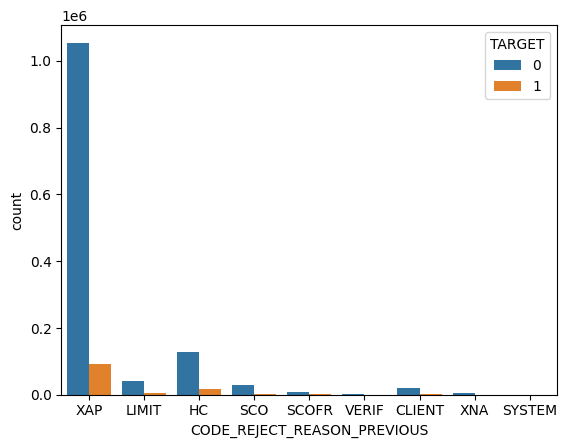

In [11]:
sns.countplot(x="CODE_REJECT_REASON_PREVIOUS" , data = df_merged , hue='TARGET')

In [12]:
xap_df = df_merged[df_merged['CODE_REJECT_REASON_PREVIOUS'] == "XAP"]
limit_df = df_merged[df_merged['CODE_REJECT_REASON_PREVIOUS'] == "LIMIT"]
hc_df = df_merged[df_merged['CODE_REJECT_REASON_PREVIOUS'] == "HC"]
sco_df = df_merged[df_merged['CODE_REJECT_REASON_PREVIOUS'] == "SCO"]
scofr_df = df_merged[df_merged['CODE_REJECT_REASON_PREVIOUS'] == "SCOFR"]
verif_df = df_merged[df_merged['CODE_REJECT_REASON_PREVIOUS'] == "VERIF"]
client_df = df_merged[df_merged['CODE_REJECT_REASON_PREVIOUS'] == "CLIENT"]
xna_df = df_merged[df_merged['CODE_REJECT_REASON_PREVIOUS'] == "XNA"]

print(xap_df.TARGET.value_counts(normalize = True) * 100)
print(limit_df.TARGET.value_counts(normalize = True) * 100)
print(hc_df.TARGET.value_counts(normalize = True) * 100)
print(sco_df.TARGET.value_counts(normalize = True) * 100)
print(scofr_df.TARGET.value_counts(normalize = True) * 100)
print(verif_df.TARGET.value_counts(normalize = True) * 100)
print(client_df.TARGET.value_counts(normalize = True) * 100)
print(xna_df.TARGET.value_counts(normalize = True) * 100)

0    92.052346
1     7.947654
Name: TARGET, dtype: float64
0    87.440605
1    12.559395
Name: TARGET, dtype: float64
0    88.265837
1    11.734163
Name: TARGET, dtype: float64
0    90.001838
1     9.998162
Name: TARGET, dtype: float64
0    79.071264
1    20.928736
Name: TARGET, dtype: float64
0    90.743748
1     9.256252
Name: TARGET, dtype: float64
0    91.748276
1     8.251724
Name: TARGET, dtype: float64
0    89.904066
1    10.095934
Name: TARGET, dtype: float64


On remarque que certaines raison de rejet augmente les chances de défaut.

## Relation entre le fait que le client ait demandé une assurance lors de son précédent prêt de la demande précédente et le risque de défaut de paiement ?

<Axes: xlabel='NFLAG_INSURED_ON_APPROVAL_PREVIOUS', ylabel='count'>

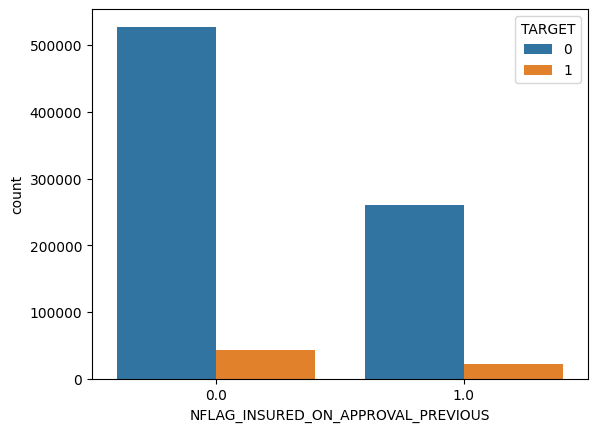

In [13]:
sns.countplot(x="NFLAG_INSURED_ON_APPROVAL_PREVIOUS" , data = df_merged , hue='TARGET')

In [14]:
assurance_df = df_merged[df_merged['NFLAG_INSURED_ON_APPROVAL_PREVIOUS'] == 1.0]
no_assurance_df = df_merged[df_merged['NFLAG_INSURED_ON_APPROVAL_PREVIOUS'] == 0.0]

print(assurance_df.TARGET.value_counts(normalize = True) * 100)
print(no_assurance_df.TARGET.value_counts(normalize = True) * 100)

0    92.386568
1     7.613432
Name: TARGET, dtype: float64
0    92.423316
1     7.576684
Name: TARGET, dtype: float64


## Quel est l'acompte moyen versé par le client lors de la demande précédente.

In [15]:
df_merged.AMT_DOWN_PAYMENT_PREVIOUS.mean()

6655.317184590784

## Relation entre l'acompte versé lors de la demande de prêt précédente et le risque de défaut

In [16]:
df_sup_moyenne_acompte = df_merged[df_merged['AMT_DOWN_PAYMENT_PREVIOUS'] > df_merged['AMT_DOWN_PAYMENT_PREVIOUS'].mean()]
df_inf_moyenne_acompte = df_merged[df_merged['AMT_DOWN_PAYMENT_PREVIOUS'] <= df_merged['AMT_DOWN_PAYMENT_PREVIOUS'].mean()]

print(df_sup_moyenne_acompte.TARGET.value_counts(normalize=True) * 100)
print(df_inf_moyenne_acompte.TARGET.value_counts(normalize=True) * 100)

0    93.656118
1     6.343882
Name: TARGET, dtype: float64
0    91.83012
1     8.16988
Name: TARGET, dtype: float64


## Quel est le taux d'endettement moyen lors de la précédente demande de prêt ?

In [17]:
df_merged['Taux_Endettement_Precedent'] = df_merged['AMT_ANNUITY_PREVIOUS'] / df_merged['AMT_INCOME_TOTAL']
print(df_merged['Taux_Endettement_Precedent'].mean())

0.10411762625616566


In [18]:
df_merged['Taux_Endettement'] = df_merged['AMT_ANNUITY'] / df_merged['AMT_INCOME_TOTAL']
print(df_merged['Taux_Endettement'].mean())

0.17443546085920203


## Est-ce que la hausse du taux d'endettement entre les deux prêt influe t-elle la target ?

On remarque une évolution du taux d'endettement moyen entre les précédents prêt et le prêt actuelle.

In [19]:
df_merged.loc[(df_merged['Taux_Endettement'] > df_merged['Taux_Endettement_Precedent']),"Difference_Taux_Endettement"] = "Oui"
df_merged.loc[(df_merged['Taux_Endettement'] < df_merged['Taux_Endettement_Precedent']),"Difference_Taux_Endettement"] = "Non"

In [20]:
tmp1 = df_merged[df_merged['Difference_Taux_Endettement'] == "Oui"]
tmp2 = df_merged[df_merged['Difference_Taux_Endettement'] == "Non"]

print(tmp1.TARGET.value_counts(normalize = True) * 100)
print(tmp2.TARGET.value_counts(normalize = True) * 100)

0    91.48262
1     8.51738
Name: TARGET, dtype: float64
0    92.238051
1     7.761949
Name: TARGET, dtype: float64


## Quel est le nombre de jour moyen avant la demande où le client a changé la pièce d'identité avec laquelle il a demandé le prêt ?

In [21]:
# Transformation de la colonne DAYS_ID_PUBLISH car elle contient uniquement des valeurs négative
application_data.DAYS_ID_PUBLISH = np.abs(application_data.DAYS_ID_PUBLISH)

In [22]:
application_data.DAYS_ID_PUBLISH.mean()

2994.2023732484367

2994 jours -> ça fait environ 8 ans.

In [23]:
df_sup_moyenne = application_data[application_data['DAYS_ID_PUBLISH'] > application_data['DAYS_ID_PUBLISH'].mean()]
df_inf_moyenne = application_data[application_data['DAYS_ID_PUBLISH'] < application_data['DAYS_ID_PUBLISH'].mean()]

print(df_sup_moyenne.TARGET.value_counts(normalize = True) * 100)
print(df_sup_moyenne.TARGET.value_counts(normalize = True) * 100)

0    93.076799
1     6.923201
Name: TARGET, dtype: float64
0    93.076799
1     6.923201
Name: TARGET, dtype: float64


La variable n'a aucune influence sur le risque de défaut de paiement du client.

## Quel est le nombre de jour moyen avant la demande où le client a changé son incription ?

In [39]:
# Transformation de la colonne DAYS_REGISTRATION car elle contient uniquement des valeurs négative
application_data.DAYS_REGISTRATION = np.abs(application_data.DAYS_REGISTRATION)

In [43]:
application_data.DAYS_REGISTRATION.mean()

4986.120327538419

4986 jours -> ça fait environ 13 ans et demi.

In [44]:
df_sup_moyenne = application_data[application_data['DAYS_REGISTRATION'] > application_data['DAYS_REGISTRATION'].mean()]
df_inf_moyenne = application_data[application_data['DAYS_REGISTRATION'] < application_data['DAYS_REGISTRATION'].mean()]

print(df_sup_moyenne.TARGET.value_counts(normalize = True) * 100)
print(df_sup_moyenne.TARGET.value_counts(normalize = True) * 100)

0    92.976968
1     7.023032
Name: TARGET, dtype: float64
0    92.976968
1     7.023032
Name: TARGET, dtype: float64


La variable n'a aucune influence sur le risque de défaut de paiement du client.

## Analyse statistiques des variables continues du dataset previous

array([[<Axes: title={'center': 'AMT_ANNUITY_PREVIOUS'}>,
        <Axes: title={'center': 'AMT_APPLICATION_PREVIOUS'}>,
        <Axes: title={'center': 'AMT_CREDIT_PREVIOUS'}>,
        <Axes: title={'center': 'AMT_DOWN_PAYMENT_PREVIOUS'}>],
       [<Axes: title={'center': 'AMT_GOODS_PRICE_PREVIOUS'}>,
        <Axes: title={'center': 'RATE_DOWN_PAYMENT_PREVIOUS'}>,
        <Axes: title={'center': 'RATE_INTEREST_PRIMARY_PREVIOUS'}>,
        <Axes: title={'center': 'RATE_INTEREST_PRIVILEGED_PREVIOUS'}>],
       [<Axes: title={'center': 'CNT_PAYMENT_PREVIOUS'}>,
        <Axes: title={'center': 'DAYS_FIRST_DRAWING_PREVIOUS'}>,
        <Axes: title={'center': 'DAYS_FIRST_DUE_PREVIOUS'}>,
        <Axes: title={'center': 'DAYS_LAST_DUE_1ST_VERSION_PREVIOUS'}>],
       [<Axes: title={'center': 'DAYS_LAST_DUE_PREVIOUS'}>,
        <Axes: title={'center': 'DAYS_TERMINATION_PREVIOUS'}>,
        <Axes: title={'center': 'NFLAG_INSURED_ON_APPROVAL_PREVIOUS'}>,
        <Axes: >]], dtype=object)

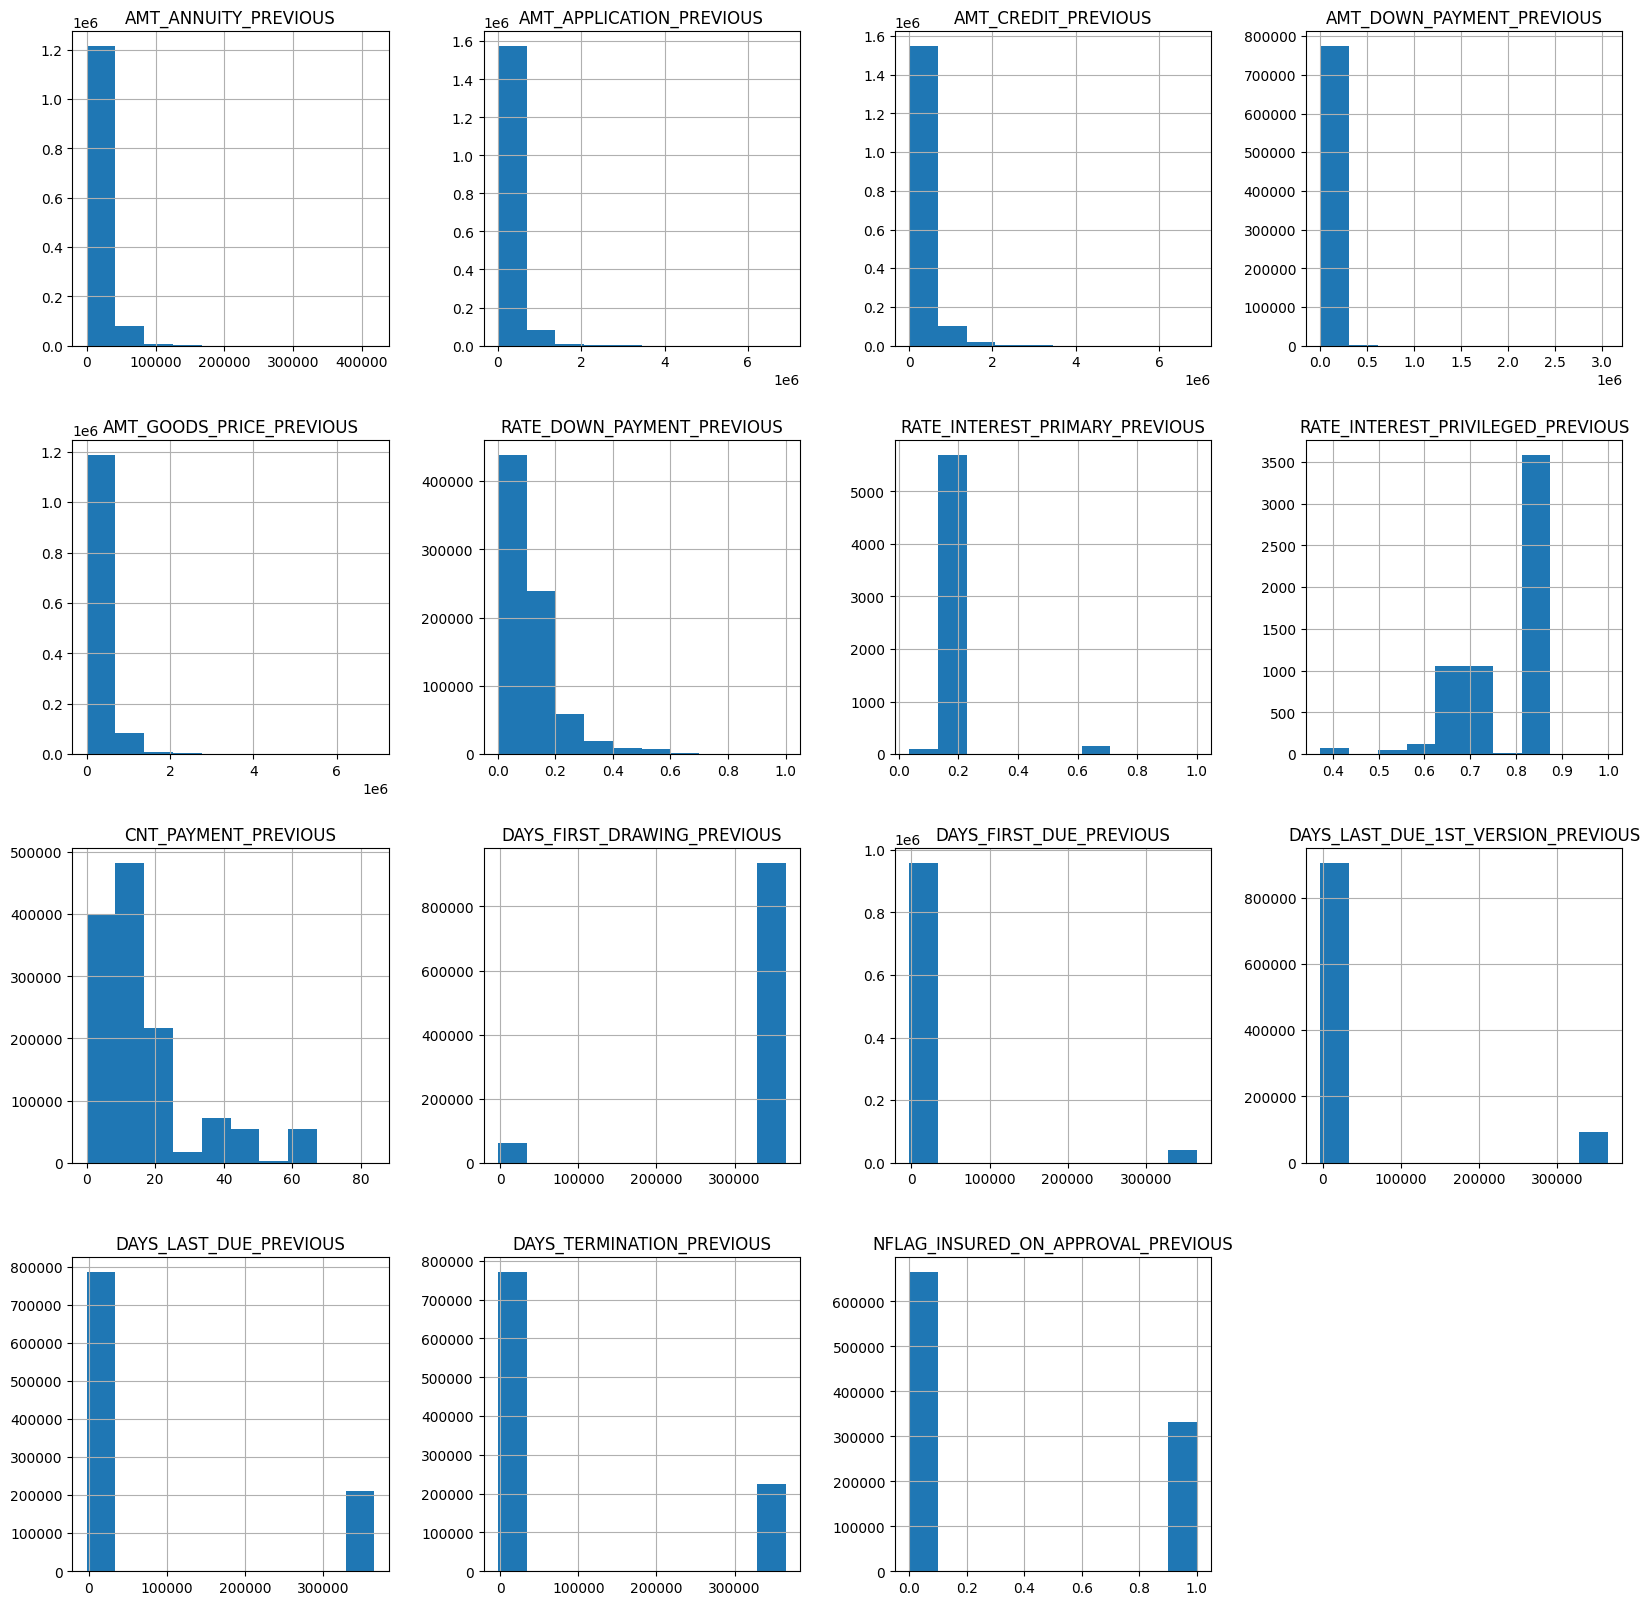

In [25]:
# Affichage
df_float.hist(figsize=(20,20))

Nous ne pourrons pas utiliser la transformation avec le logarithme car la fonction Ln n'est pas défini en 0.

In [33]:
# Transformation racine quadratique
df_racine_quadratique = df_float.copy()
df_racine_quadratique = np.sqrt(np.sqrt(df_racine_quadratique))

array([[<Axes: title={'center': 'AMT_ANNUITY_PREVIOUS'}>,
        <Axes: title={'center': 'AMT_APPLICATION_PREVIOUS'}>,
        <Axes: title={'center': 'AMT_CREDIT_PREVIOUS'}>,
        <Axes: title={'center': 'AMT_DOWN_PAYMENT_PREVIOUS'}>],
       [<Axes: title={'center': 'AMT_GOODS_PRICE_PREVIOUS'}>,
        <Axes: title={'center': 'RATE_DOWN_PAYMENT_PREVIOUS'}>,
        <Axes: title={'center': 'RATE_INTEREST_PRIMARY_PREVIOUS'}>,
        <Axes: title={'center': 'RATE_INTEREST_PRIVILEGED_PREVIOUS'}>],
       [<Axes: title={'center': 'CNT_PAYMENT_PREVIOUS'}>,
        <Axes: title={'center': 'DAYS_FIRST_DRAWING_PREVIOUS'}>,
        <Axes: title={'center': 'DAYS_FIRST_DUE_PREVIOUS'}>,
        <Axes: title={'center': 'DAYS_LAST_DUE_1ST_VERSION_PREVIOUS'}>],
       [<Axes: title={'center': 'DAYS_LAST_DUE_PREVIOUS'}>,
        <Axes: title={'center': 'DAYS_TERMINATION_PREVIOUS'}>,
        <Axes: title={'center': 'NFLAG_INSURED_ON_APPROVAL_PREVIOUS'}>,
        <Axes: >]], dtype=object)

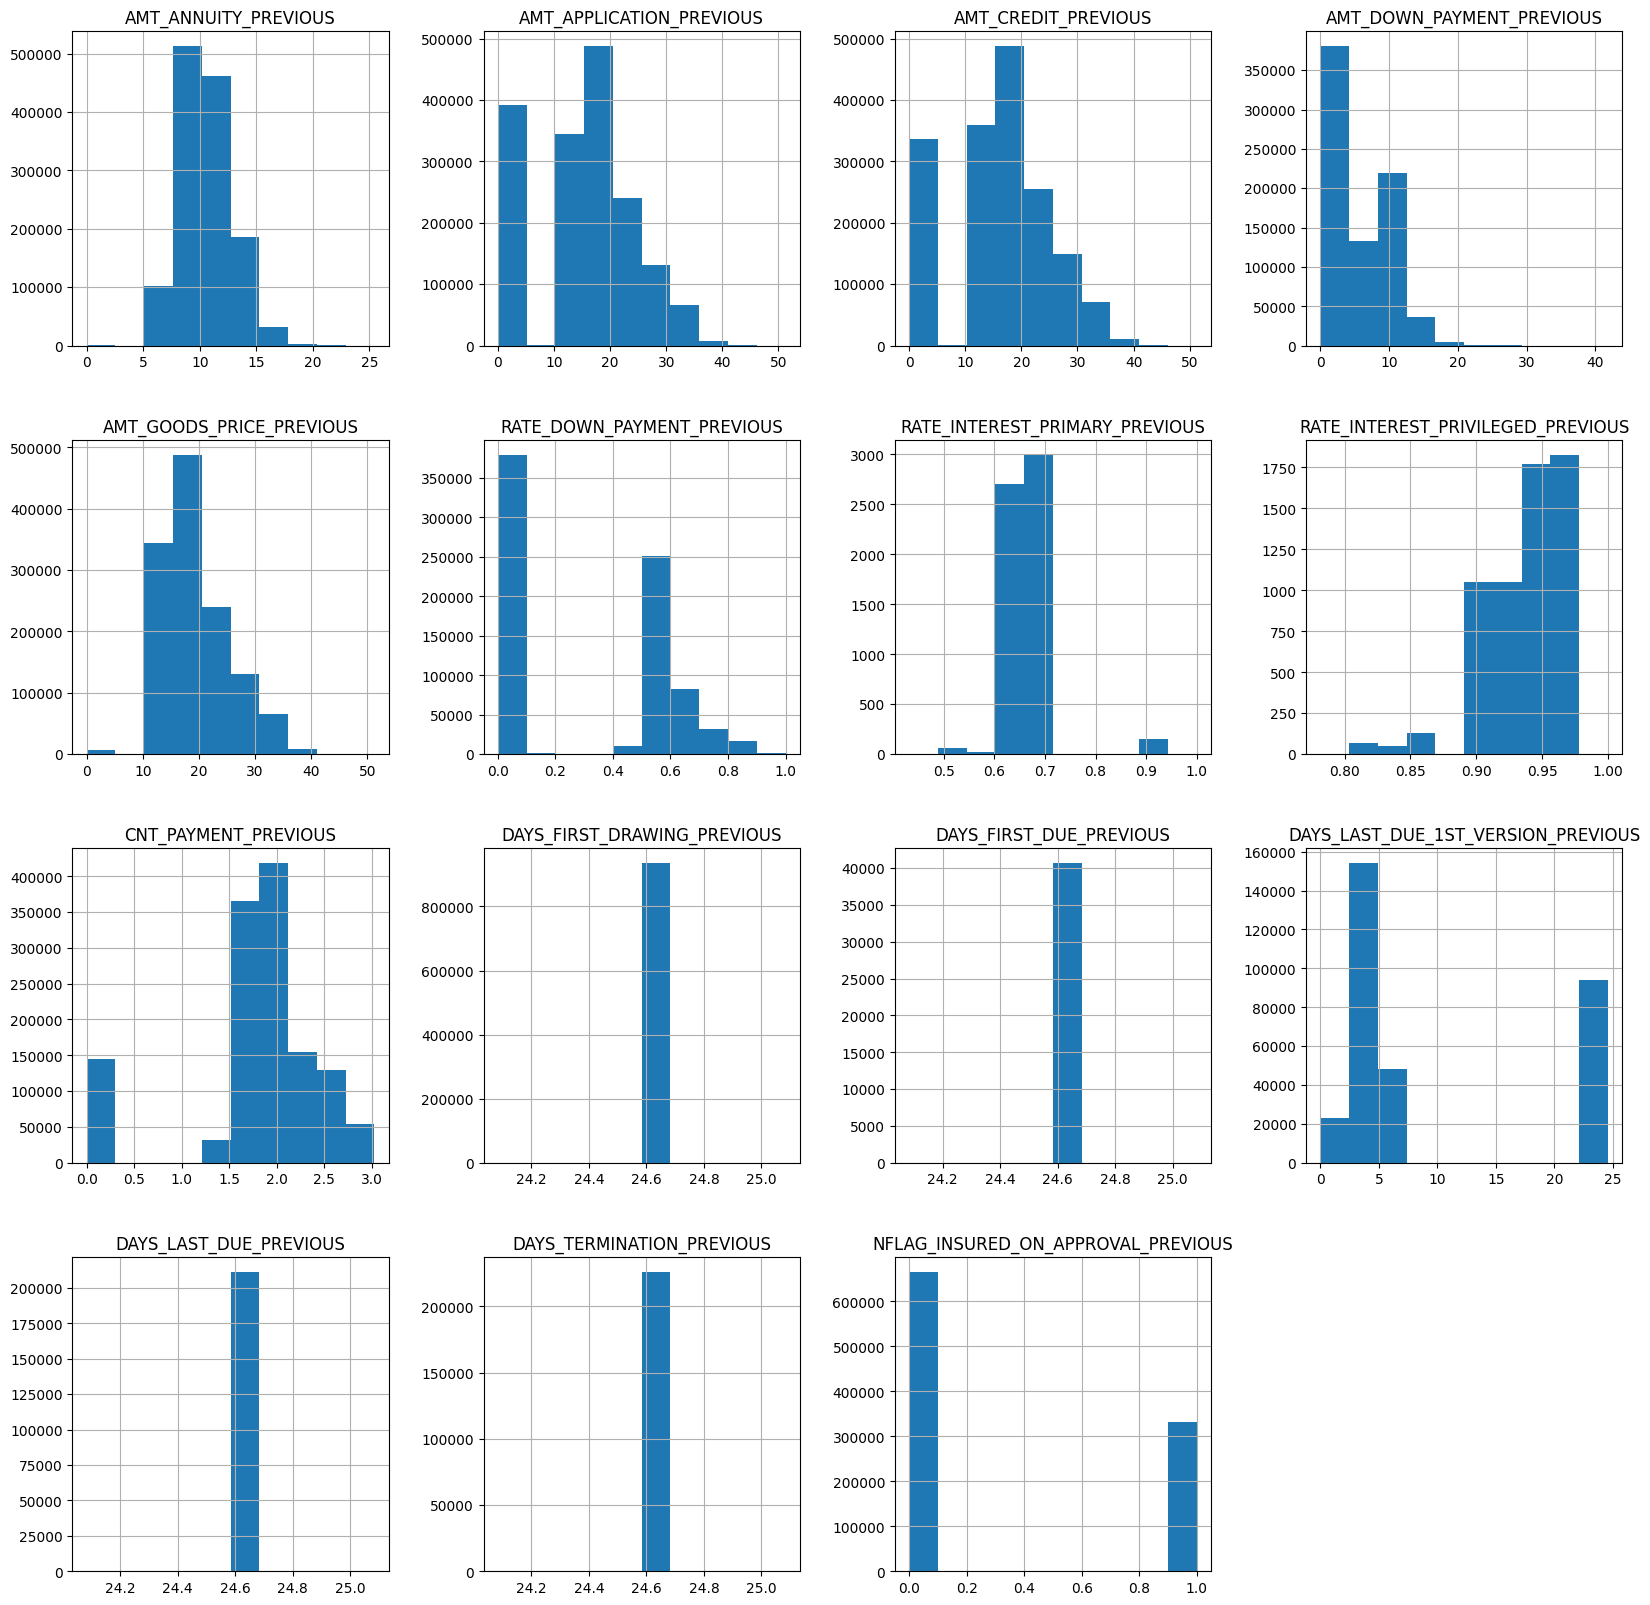

In [34]:
# Affichage
df_racine_quadratique.hist(figsize=(20,20))

La racine quadratique donne des résultats satisfaisant pour la majorité des variables qui ont maintenant une distribution plus ou moins similaire à une loi normale.

In [36]:
log_cols = ["RATE_INTEREST_PRIVILEGED_PREVIOUS"]
df_log = df_float[log_cols]
df_log = np.log(df_log)

array([[<Axes: title={'center': 'RATE_INTEREST_PRIVILEGED_PREVIOUS'}>]],
      dtype=object)

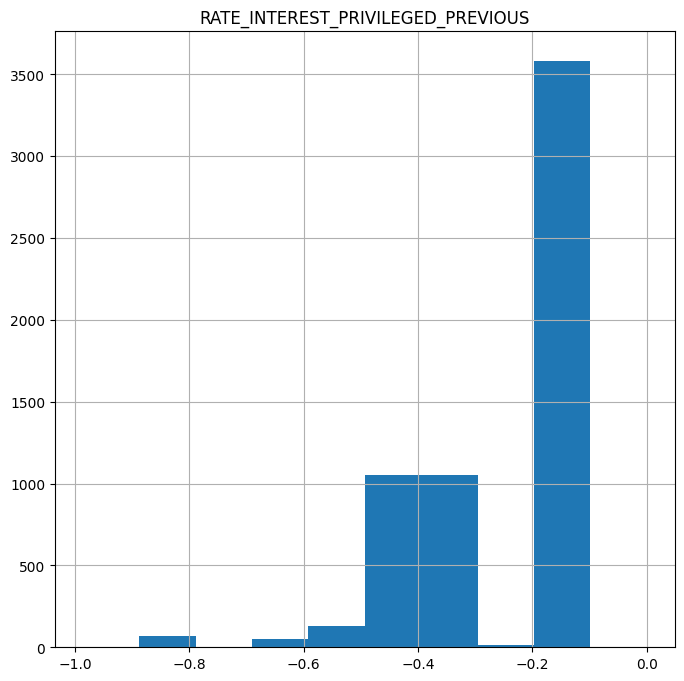

In [37]:
# Affichage
df_log.hist(figsize=(8,8))

Toujours pas de distribution normale sur cette variable.